<a href="https://colab.research.google.com/github/Himanshukunar/excelr-assignments/blob/main/Assignment17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (2000, 26)
Columns: Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')
   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gil

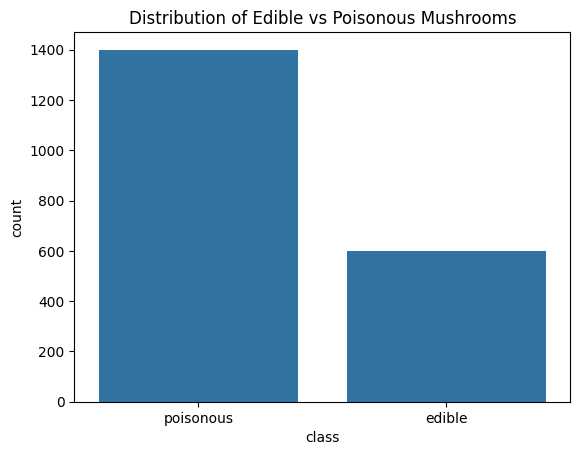


Unique values per feature:
Unnamed: 0                  976
cap_shape                     5
cap_surface                   4
cap_color                     9
bruises                       2
odor                          9
gill_attachment               4
gill_spacing                  3
gill_size                     2
gill_color                   12
stalk_shape                   2
stalk_root                    7
stalk_surface_above_ring      4
stalk_surface_below_ring      4
stalk_color_above_ring        9
stalk_color_below_ring        9
veil_type                     2
veil_color                    4
ring_number                   3
ring_type                     8
spore_print_color             9
population                    6
habitat                       7
class                         2
stalk_height                973
cap_diameter                976
dtype: int64


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("mushroom.csv")

print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

sns.countplot(data=df, x='class')
plt.title("Distribution of Edible vs Poisonous Mushrooms")
plt.show()

print("\nUnique values per feature:")
print(df.nunique())


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df_encoded = df.apply(LabelEncoder().fit_transform)

X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1600, 25)
X_test shape: (400, 25)
y_train shape: (1600,)
y_test shape: (400,)


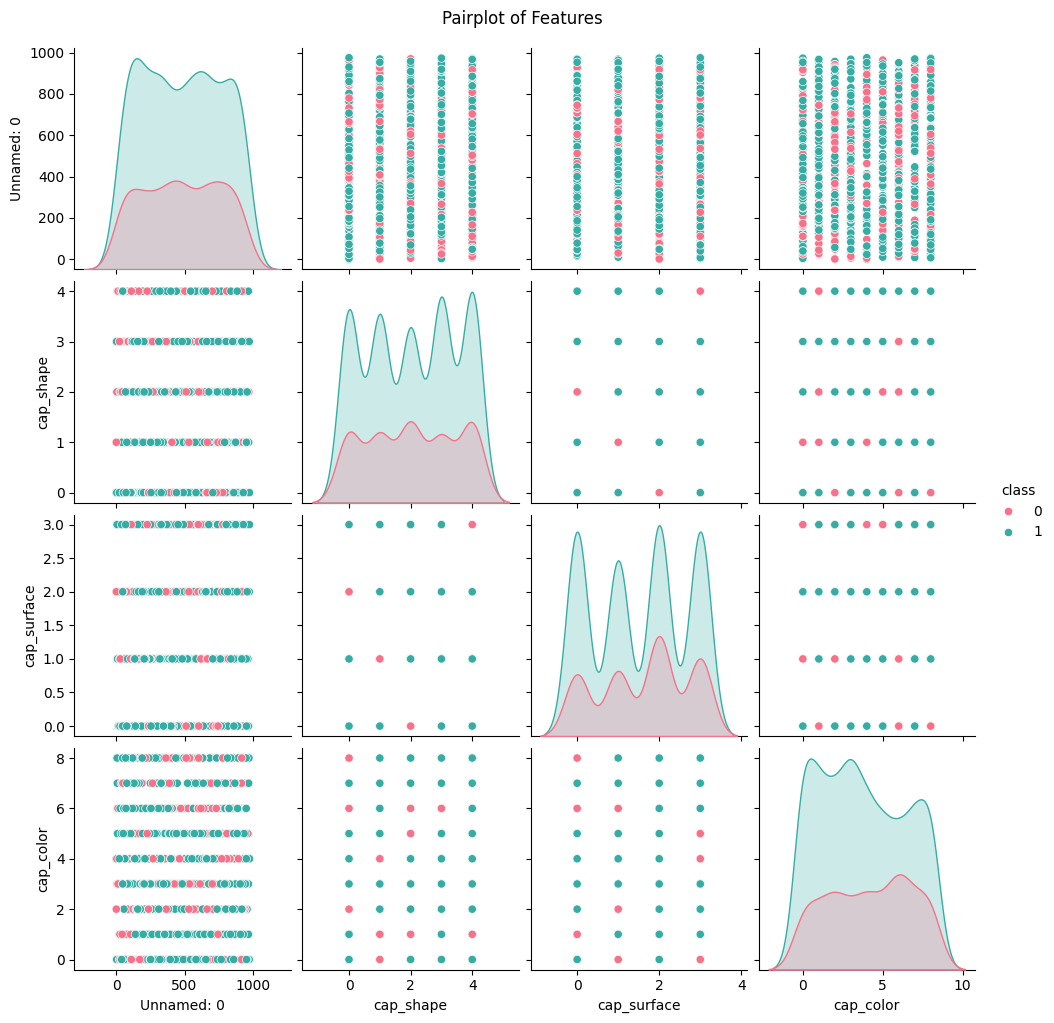

In [6]:

selected_features = X.columns[:4]  # choose only a few to avoid clutter
df_vis = df_encoded[selected_features].copy()
df_vis['class'] = y

sns.pairplot(df_vis, hue='class', palette='husl')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



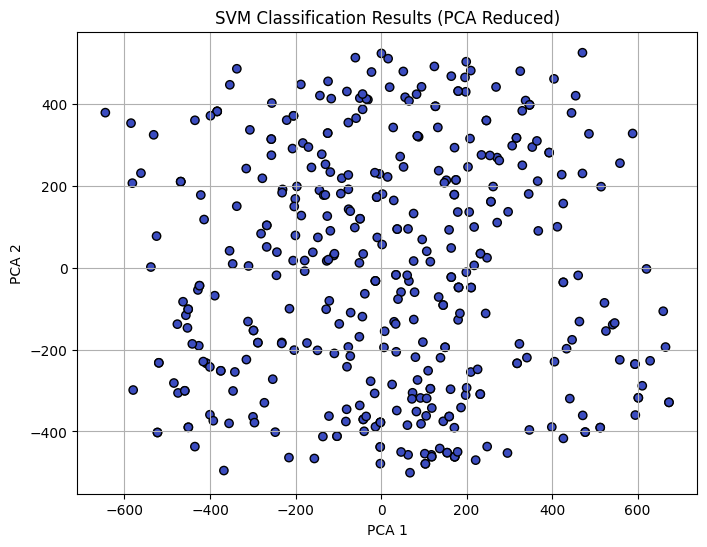

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)

svm_pca = SVC(kernel='rbf', C=1.0)
svm_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_pca.predict(X_test_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_pca, cmap='coolwarm', edgecolors='k')
plt.title("SVM Classification Results (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Reduce grid size: Try fewer combinations
param_grid = {
    'C': [0.1, 1],               # Smaller set
    'kernel': ['linear', 'rbf'],  # Remove 'poly' for now
    # 'degree': [2, 3]  # Only needed for 'poly' kernel
}

# Grid search with 3-fold cross-validation instead of 5
grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit (should be faster now)
grid.fit(X_train, y_train)

# Best result
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate on test set
from sklearn.metrics import accuracy_score
y_pred_best = grid.best_estimator_.predict(X_test)
print("Test Accuracy of Best Model:", accuracy_score(y_test, y_pred_best))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.708125162496223
Test Accuracy of Best Model: 0.6675
